# Restauração de imagens

Material baseado no conteúdo das aulas de Moacir Ponti



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Geração de ruído artificial
Algumas distribuições de ruído muitas vezes são modeladas por meio de alguma distribuição de probabilidade paramétrica, por exemplo:
* Uniforme: todos os intervalos de valores que podem ser adicionados à imagem são igualmente prováveis
* Gaussiano (normal): os valores a serem adicionados à imagem seguem uma distribuição normal, com alguma média (geralmente zero) e desvio padrão para que valores distantes da média sejam menos prováveis de ambos os lados (positivo e negativo)


In [2]:
def uniform_noise(size, prob = 0.1):
    '''
    Gera uma matriz com ruído uniforme no intervalo [0-255] para ser adicionada a uma imagem
    
     : size: tupla definindo o tamanho da matriz de ruído
     : prob: probabilidade para a geração uniforme de ruído
     : tipo prob: float
     : retorna matriz com ruído uniforme a ser adicionado à imagem
    '''

    levels = int((prob * 255) // 2)
    noise = np.random.randint(-levels, levels, (size))
    
    return noise

In [3]:
img = cv2.imread("pattern2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# imprime os valores únicos existentes na imagem
# Logo abaixo, é possível notar que a imagem possui apenas 3 valores de pixeis diferentes
np.unique(img)

array([ 32, 127, 186], dtype=uint8)

In [4]:
u_noise = uniform_noise(img.shape, prob = 0.1)

# adiciona ruido à imagem
# a função clip limita valores dos pontos da imagem resultante da soma entre 0 e 255
img_uni = np.clip(img.astype(int) + u_noise, 0, 255)

hist_img,_ = np.histogram(img, bins = 256, range = (0, 255))
hist_uni,_ = np.histogram(img_uni, bins = 256, range = (0, 255))

<BarContainer object of 256 artists>

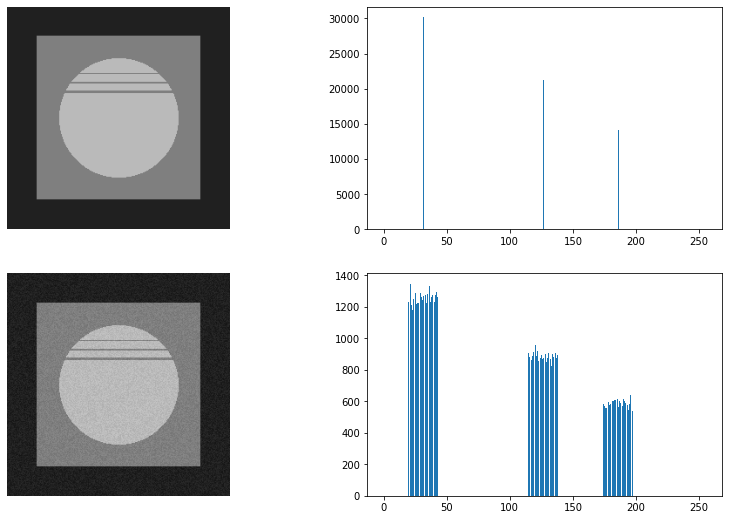

In [5]:
#Exibindo a imagem original e com ruído
plt.figure(figsize = (14, 9))

plt.subplot(221)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(222)
plt.bar(np.arange(256), hist_img)

plt.subplot(223)
plt.imshow(img_uni, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(224)
plt.bar(np.arange(256), hist_uni)

A imagem original (acima) é livre de ruído. Quando adicionamos ruído uniforme, os valores são adicionados (ou subtraídos) dessas intensidades, produzindo uma variedade mais ampla de intensidades em torno dos valores originais. Observe como os valores são aproximadamente uniformes.

In [6]:
#imprime os valores de intensidade na imagem que foi incluída o ruído
np.unique(img_uni)

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197])

In [7]:
def gaussian_noise(size, mean = 0, std = 0.01):
    '''
    Gera uma matriz com ruído gaussiano no intervalo [0-255] para ser adicionada a uma imagem
    
     : param size: tupla definindo o tamanho da matriz de ruído
     : param mean: média da distribuição gaussiana
     : param std: desvio padrão da distribuição Gaussiana, padrão 0,01
     : Retorna matriz com ruído gaussiano a ser adicionado à imagem
    '''
    noise = np.random.normal(mean, std, size) * 255
    
    return noise

In [8]:
# gerando uma matriz com ruído Gaussiano, considereando valores default de mean e std
gau_noise = gaussian_noise(img.shape)

img_gau = np.clip(img.astype(int) + gau_noise, 0, 255)

hist_gau, _ = np.histogram(img_gau, bins = 256, range = (0, 255))

<BarContainer object of 256 artists>

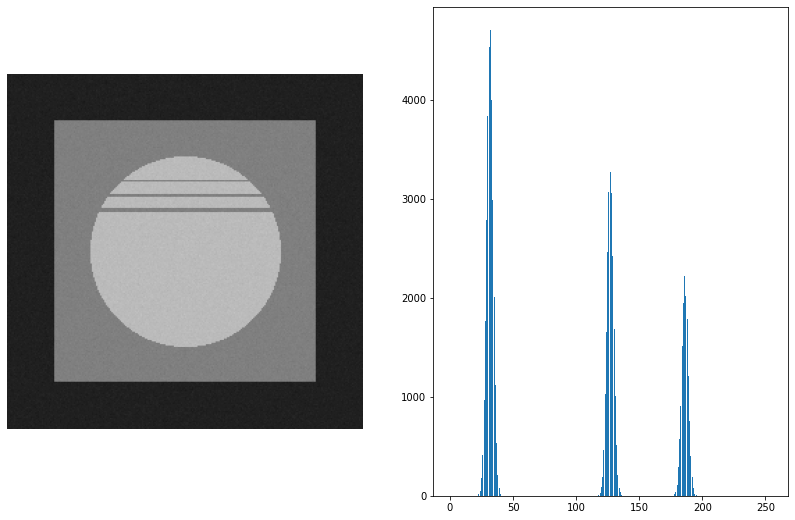

In [9]:
plt.figure(figsize = (14, 9))

plt.subplot(121)

plt.imshow(img_gau, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(122)
plt.bar(np.arange(256), hist_gau)

No caso do ruído gaussiano, os valores são mais prováveis em torno dos valores de intensidade, que são a média da distribuição, conforme apresentado no histograma acima.

In [10]:
# filtro sal e pimenta (salt and pepper)
def impulsive_noise(image, prob = 0.1):
    '''
    Retorna imagem com ruído impulsivo (0 e / ou 255) para substituir pixels na imagem com alguma probabilidade
    
     : imagem param: imagem de entrada
     : param prob: probabilidade para a geração de ruído impulsivo
     : modo param: tipo de ruído, 'sal', 'pimenta' ou 'salt_and_pepper' (padrão)
     : tipo prob: float
     : retorna imagem com ruído impulsivo
    '''

    noise = np.array(image, copy = True)
    for i in np.arange(image.shape[0]):
        for j in np.arange(image.shape[1]):
            rnd = np.random.random()
            
            if rnd < prob:
                rnd = np.random.random()
                
                if rnd > 0.5:
                    noise[i, j] = 255
                else:
                    noise[i, j] = 0
    
    return noise

In [11]:
img_imp = impulsive_noise(img)

hist_imp, _ = np.histogram(img_imp, bins = 256, range = (0, 255))

<BarContainer object of 256 artists>

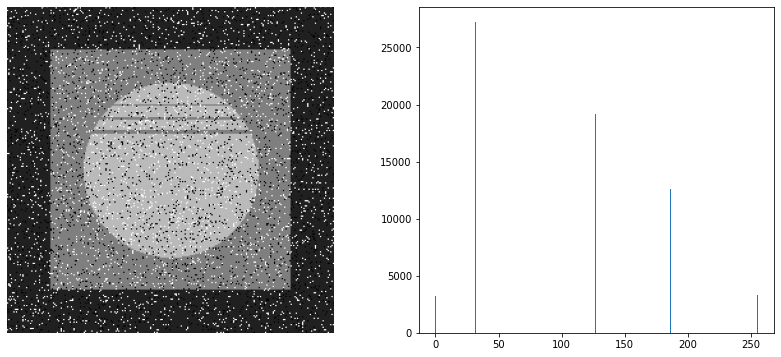

In [12]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
plt.imshow(img_imp, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(122)
plt.bar(np.arange(256), hist_imp)

### Métodos de remoção de ruído

Em princípio, considerando uma formação de ruído aditiva, você poderia apenas gerar o ruído e subtraí-lo da imagem. No entanto, isso pode não produzir os resultados desejados. Portanto, filtros de suavização como o filtro *Gaussiano*, o filtro *Mediana* podem ser usados para reduzir a variância localmente na tentativa de diminuir o ruído das imagens.

In [13]:
# Gera ruído e subtrai da imagem original
uni_noise_new = uniform_noise(img.shape)
img_uni_res = img_uni - uni_noise_new

def rmse(f, g):
    size = f.shape
    return np.sqrt(np.sum(np.square(f - g)) / (size[0] * size[1]))

# Após executar os comandos abaixo, é possível observar que a imagem restaurada resultou em mais ruídos em 
# vez de reduzir.
print("Erro entre ruído e original: %.3f%%" % (rmse(img.astype(float), img_uni.astype(float))))
print("Erro entre restaurada e original: %.3f%%" % (rmse(img_uni_res.astype(float), img.astype(float))))

Erro entre ruído e original: 6.935%
Erro entre restaurada e original: 9.820%


(-0.5, 255.5, 255.5, -0.5)

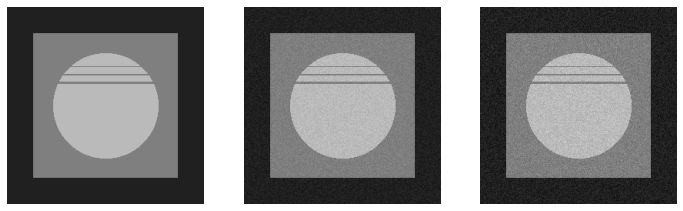

In [15]:
plt.figure(figsize = (12, 6))

plt.subplot(131)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(132)
plt.imshow(img_uni, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

plt.subplot(133)
plt.imshow(img_uni_res, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')

### Filtros de remoção de ruído

Vamos criar um filtro para diminuir o ruído. Existem diversos filtros, mas os mais utilizados são a média, a Gaussiana e a mediana. A escolha do método depende do ruído.

Todos os filtros de eliminação de ruído funcionam reduzindo a variação local.

In [17]:
# importing the fft algorithms
# including the transform, inverse and the shift methods
from scipy.fftpack import fftn, ifftn, fftshift

In [18]:
f = cv2.imread("moon2.jpg")
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

#adiciona um ruido gaussiano na imagem
g = f + gaussian_noise(f.shape, mean = 0, std = 0.08)
g = np.clip(g.astype(int), 0, 255)

# Criação de um filtro de média 7x7
K = 7
w_mean = np.ones([K, K]) / float(K * K)

#cria um filtro de transformada de Fourier
def fft_imagefilter(g, w):
    ''' Filtra a imagem g com o filtro w
    '''
    # preenchendo o filtro para que ele tenha o mesmo tamanho da imagem
    pad1 = (g.shape[0] // 2) - w.shape[0] // 2
    wp = np.pad(w, (pad1, pad1 - 1), "constant",  constant_values = 0)

    # Aplicação de transformada de Fourier
    W = fftn(wp)
    G = fftn(g)
    R = np.multiply(W, G)
    
    r = np.real(fftshift(ifftn(R)))
    return r

r_mean = fft_imagefilter(g, w_mean)

(-0.5, 255.5, 255.5, -0.5)

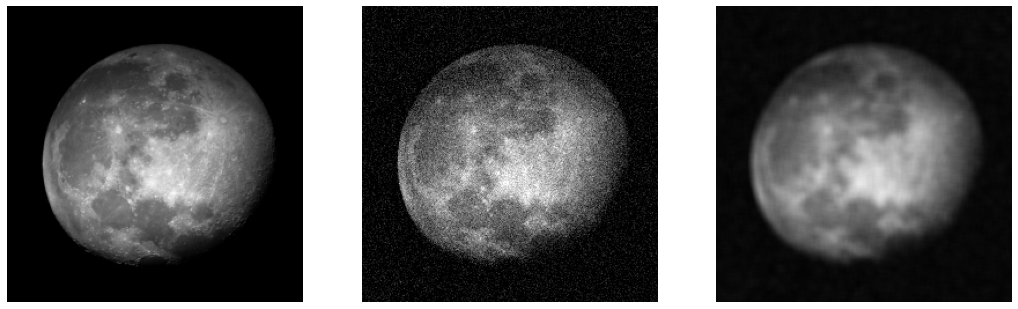

In [19]:
plt.figure(figsize = (18, 6))

plt.subplot(131)
plt.imshow(f, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off')

plt.subplot(132)
plt.imshow(g, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off')

plt.subplot(133)
plt.imshow(r_mean, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off')

In [20]:
def medianfilter(g, k):
    ''' Filtro da mediana com tamanho K
    '''
    a = k // 2
    r = np.zeros(g.shape)
    for x in np.arange(a, g.shape[0] - a + 1):
        for y in np.arange(a, g.shape[1] - a + 1):
            med_region = np.median(g[x - a : x + a + 1, y - a : y + a + 1])
            r[x, y] = med_region
    
    return r

r_median = medianfilter(g, 7)

Text(0.5, 1.0, 'median filter')

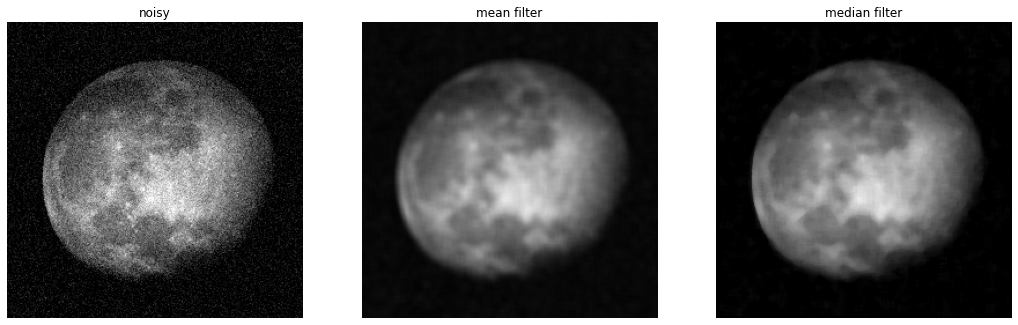

In [21]:
plt.figure(figsize = (18, 6))

plt.subplot(131)
plt.imshow(g, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('noisy')

plt.subplot(132)
plt.imshow(r_mean, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('mean filter')

plt.subplot(133)
plt.imshow(r_median, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('median filter')

Text(0.5, 1.0, 'median filter')

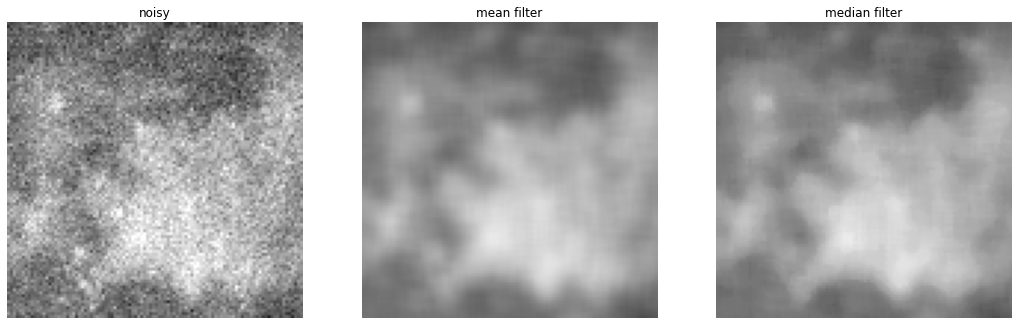

In [22]:
plt.figure(figsize = (18, 6))

plt.subplot(131)
plt.imshow(g[80 : 180, 80 : 180], cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('noisy')

plt.subplot(132)
plt.imshow(r_mean[80 : 180, 80 : 180], cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('mean filter')

plt.subplot(133)
plt.imshow(r_median[80 : 180, 80 : 180], cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('median filter')

In [23]:
print ("Erro entre a média filtrada e o original:% .3f %%"% (rmse (f.astype (float), r_mean.astype (float))))
print ("Erro entre mediana-filtrada e original:% .3f %%"% (rmse (f.astype (float), r_median.astype (float))))

Erro entre a média filtrada e o original: 8.915 %
Erro entre mediana-filtrada e original: 6.439 %


Vamos fazer o mesmo, mas para uma imagem com ruído de sal e pimenta. Comparando um filtro de média e um filtro de mediana com tamanho 3 × 3

In [24]:
img_imp = impulsive_noise(img, prob = 0.05)

w_mean3 = np.ones([3, 3]) / float(3 * 3)
img_mean = fft_imagefilter(img_imp, w_mean3)
img_median = medianfilter(img_imp, 3)

Text(0.5, 1.0, 'median filter')

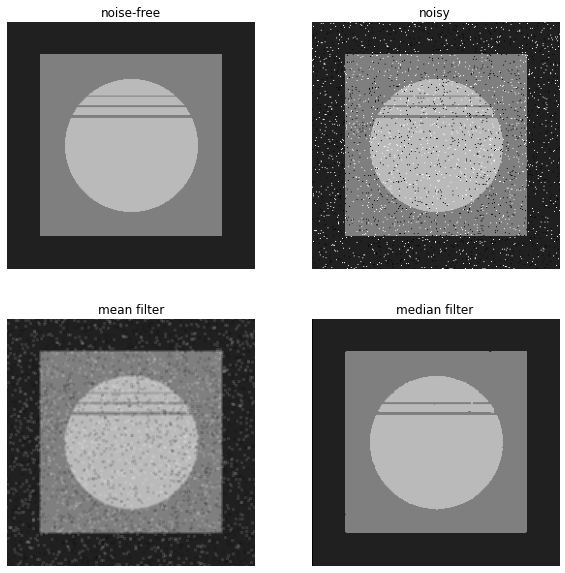

In [25]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('noise-free')

plt.subplot(222)
plt.imshow(img_imp, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('noisy')

plt.subplot(223)
plt.imshow(img_mean, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('mean filter')

plt.subplot(224)
plt.imshow(img_median, cmap = "gray", vmin = 0, vmax = 255); plt.axis('off'); plt.title('median filter')

Isso mostra como é relevante conhecer o processo de ruído antes de projetar um filtro para removê-lo.

## Mais referências para Opencv

https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html

https://acervolima.com/python-denoising-de-imagens-coloridas-usando-opencv/

https://acervolima.com/python-desfocagem-de-imagem-usando-opencv/

https://acervolima.com/adicione-um-ruido-de-sal-e-pimenta-a-uma-imagem-com-python/